In [2]:
import pandas as pd
import os
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import matplotlib.pyplot as plt
%matplotlib inline
# Control the default size of figures in this Jupyter 
%pylab inline

c:\users\user\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
c:\users\user\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


Populating the interactive namespace from numpy and matplotlib


In [4]:
#from google.colab import drive
#drive.mount('/content/drive')

In [95]:
btc = pd.read_csv('datasets/btc.csv')

In [96]:
X = btc.columns

In [97]:
len(X)

144

In [98]:
CorrMatrix = btc.corr()

In [99]:
CorrMatrix

,AdrActCnt,AdrBal1in100KCnt,AdrBal1in100MCnt,AdrBal1in10BCnt,AdrBal1in10KCnt,AdrBal1in10MCnt,AdrBal1in1BCnt,AdrBal1in1KCnt,AdrBal1in1MCnt,AdrBalCnt,...,TxTfrCnt,TxTfrValAdjNtv,TxTfrValAdjUSD,TxTfrValMeanNtv,TxTfrValMeanUSD,TxTfrValMedNtv,TxTfrValMedUSD,VelCur1yr,VtyDayRet180d,VtyDayRet30d
AdrActCnt,1.000000,-0.293114,0.959280,0.933331,0.109645,0.933356,0.945314,-0.147052,0.690680,0.938918,...,0.968626,0.399321,0.631896,-0.149512,0.481850,-0.093678,0.816900,-0.096311,-0.499798,-0.252212
AdrBal1in100KCnt,-0.293114,1.000000,-0.309549,-0.252699,-0.328966,-0.394276,-0.273878,-0.161814,-0.451373,-0.251123,...,-0.314936,-0.387282,-0.059953,0.196130,-0.055710,0.097943,-0.106038,-0.330138,-0.648018,0.106990
AdrBal1in100MCnt,0.959280,-0.309549,1.000000,0.978686,0.111987,0.964576,0.991321,-0.152394,0.709240,0.974173,...,0.935402,0.322134,0.598424,-0.158778,0.473382,-0.100698,0.785405,-0.128156,-0.479558,-0.267493
AdrBal1in10BCnt,0.933331,-0.252699,0.978686,1.000000,0.109693,0.896603,0.996736,-0.183216,0.588841,0.996982,...,0.891610,0.227747,0.683924,-0.128702,0.531953,-0.080290,0.816882,-0.214708,-0.397551,-0.212175
AdrBal1in10KCnt,0.109645,-0.328966,0.111987,0.109693,1.000000,0.111685,0.110426,-0.058473,0.040275,0.109257,...,0.111297,0.075143,0.329730,-0.113101,0.251103,-0.056910,0.355296,0.058790,-0.420302,-0.331279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TxTfrValMedNtv,-0.093678,0.097943,-0.100698,-0.080290,-0.056910,-0.138450,-0.087432,-0.144914,-0.239691,-0.079883,...,-0.100932,-0.122873,-0.067953,0.934858,-0.060693,1.000000,-0.100469,-0.099915,0.517421,0.123268
TxTfrValMedUSD,0.816900,-0.106038,0.785405,0.816882,0.355296,0.708776,0.807810,-0.499018,0.451439,0.828832,...,0.744046,0.110658,0.693908,-0.210116,0.554426,-0.100469,1.000000,-0.323166,-0.196974,-0.047562
VelCur1yr,-0.096311,-0.330138,-0.128156,-0.214708,0.058790,0.021704,-0.187431,0.235615,0.356973,-0.200806,...,-0.051298,0.511388,-0.290855,-0.134367,-0.211214,-0.099915,-0.323166,1.000000,0.033363,-0.069620
VtyDayRet180d,-0.499798,-0.648018,-0.479558,-0.397551,-0.420302,-0.580016,-0.425242,0.596823,-0.705123,-0.397263,...,-0.558158,-0.283016,-0.187224,0.314915,-0.135925,0.517421,-0.196974,0.033363,1.000000,0.579708


In [100]:
CorrMatrix['PriceUSD']

AdrActCnt           0.669306
AdrBal1in100KCnt   -0.066500
AdrBal1in100MCnt    0.662764
AdrBal1in10BCnt     0.758278
AdrBal1in10KCnt     0.379084
                      ...   
TxTfrValMedNtv     -0.074379
TxTfrValMedUSD      0.726463
VelCur1yr          -0.342200
VtyDayRet180d      -0.202930
VtyDayRet30d       -0.092327
Name: PriceUSD, Length: 143, dtype: float64

In [101]:
CorrMatrix = CorrMatrix[abs(CorrMatrix['PriceUSD'])>= 0.5]

In [102]:
CorrMatrix['AdrBal1in100KCnt']

AdrActCnt             -0.293114
AdrBal1in100MCnt      -0.309549
AdrBal1in10BCnt       -0.252699
AdrBal1in10MCnt       -0.394276
AdrBal1in1BCnt        -0.273878
                         ...   
SplyMiner1HopAllUSD   -0.068004
TxTfrCnt              -0.314936
TxTfrValAdjUSD        -0.059953
TxTfrValMeanUSD       -0.055710
TxTfrValMedUSD        -0.106038
Name: AdrBal1in100KCnt, Length: 72, dtype: float64

In [103]:
for el in CorrMatrix.columns:
    if el not in CorrMatrix.index:
        del CorrMatrix[el]

In [104]:
CorrMatrix

,AdrActCnt,AdrBal1in100MCnt,AdrBal1in10BCnt,AdrBal1in10MCnt,AdrBal1in1BCnt,AdrBalCnt,AdrBalNtv0.001Cnt,AdrBalNtv0.01Cnt,AdrBalNtv0.1Cnt,AdrBalNtv1Cnt,...,SplyAdrTop1Pct,SplyCur,SplyExpFut10yr,SplyMiner0HopAllUSD,SplyMiner1HopAllNtv,SplyMiner1HopAllUSD,TxTfrCnt,TxTfrValAdjUSD,TxTfrValMeanUSD,TxTfrValMedUSD
AdrActCnt,1.000000,0.959280,0.933331,0.933356,0.945314,0.938918,0.928877,0.944421,0.953810,0.954066,...,0.898689,0.850978,0.841793,0.670559,-0.008194,0.677923,0.968626,0.631896,0.481850,0.816900
AdrBal1in100MCnt,0.959280,1.000000,0.978686,0.964576,0.991321,0.974173,0.973876,0.988967,0.997138,0.990004,...,0.926561,0.882404,0.875001,0.663810,0.007185,0.670118,0.935402,0.598424,0.473382,0.785405
AdrBal1in10BCnt,0.933331,0.978686,1.000000,0.896603,0.996736,0.996982,0.999607,0.998000,0.991149,0.944485,...,0.849786,0.799861,0.792183,0.759104,-0.060751,0.764909,0.891610,0.683924,0.531953,0.816882
AdrBal1in10MCnt,0.933356,0.964576,0.896603,1.000000,0.925059,0.892626,0.888168,0.918609,0.944007,0.991495,...,0.987140,0.964048,0.958619,0.545648,0.165636,0.552262,0.934223,0.492282,0.398524,0.708776
AdrBal1in1BCnt,0.945314,0.991321,0.996736,0.925059,1.000000,0.992199,0.994358,0.999709,0.998172,0.965059,...,0.879859,0.831337,0.823767,0.718506,-0.039757,0.724422,0.910874,0.647859,0.506821,0.807810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SplyMiner1HopAllUSD,0.677923,0.670118,0.764909,0.552262,0.724422,0.790561,0.780174,0.732848,0.705870,0.619977,...,0.551026,0.537869,0.546389,0.999155,-0.571571,1.000000,0.599971,0.902678,0.685093,0.735319
TxTfrCnt,0.968626,0.935402,0.891610,0.934223,0.910874,0.893716,0.885471,0.908081,0.923997,0.943526,...,0.909430,0.867847,0.857861,0.593307,0.027164,0.599971,1.000000,0.566011,0.427828,0.744046
TxTfrValAdjUSD,0.631896,0.598424,0.683924,0.492282,0.647859,0.713955,0.698286,0.655677,0.630374,0.552149,...,0.495079,0.481469,0.489861,0.908447,-0.538470,0.902678,0.566011,1.000000,0.730181,0.693908
TxTfrValMeanUSD,0.481850,0.473382,0.531953,0.398524,0.506821,0.558852,0.543027,0.511908,0.494305,0.440278,...,0.402169,0.390258,0.397471,0.690324,-0.436415,0.685093,0.427828,0.730181,1.000000,0.554426


In [105]:
CorrMatrix['PriceUSD']

AdrActCnt              0.669306
AdrBal1in100MCnt       0.662764
AdrBal1in10BCnt        0.758278
AdrBal1in10MCnt        0.544433
AdrBal1in1BCnt         0.717605
                         ...   
SplyMiner1HopAllUSD    0.999251
TxTfrCnt               0.592216
TxTfrValAdjUSD         0.907993
TxTfrValMeanUSD        0.689674
TxTfrValMedUSD         0.726463
Name: PriceUSD, Length: 72, dtype: float64

In [164]:
list(CorrMatrix.columns).remove("PriceUSD")

In [192]:
correlated_features = dict()
for feat1 in CorrMatrix.columns:
    if feat1 != "PriceUSD": 
        correlated_features[feat1] = []
        for feat2 in CorrMatrix.columns:
            if abs(CorrMatrix[feat1][feat2]) > 0.9 and feat1 != feat2:
                if feat1 != "PriceUSD" and feat2 != "PriceUSD":
                    correlated_features[feat1].append(feat2)

In [212]:
highlyCorrelated = list()
corSet = set()
for column in correlated_features.keys():
    maxCor = 0
    bestCor = None
    for el in correlated_features[column] + [column]:
        if abs(CorrMatrix['PriceUSD'][el]) > maxCor:
            maxCor = abs(CorrMatrix['PriceUSD'][el])
            bestCor = el
            
    highlyCorrelated.append(bestCor)
    corSet.add(bestCor)

In [215]:
for el in list(corSet):
    print(el + " " + str(CorrMatrix['PriceUSD'][el]))

AdrBal1in100MCnt 0.6627642503875658
AdrBalCnt 0.7849070634315904
AdrBalUSD100Cnt 0.9338598322428235
AdrBalUSD10Cnt 0.8914132600646086
FlowInExUSD 0.8586134016997273
SplyAdrBalUSD1M 0.7773306057502907
AssetEODCompletionTime 0.7427912111479499
SplyMiner1HopAllNtv -0.5720886713335323
TxTfrValMeanUSD 0.6896735303969167
SplyAdrBalUSD100K 0.6377915470303931
AdrBalUSD10MCnt 0.9977136702318921
AdrBalUSD1KCnt 0.95581245070942
SplyMiner0HopAllUSD 0.9999854786076847
SplyAdrBalUSD10M 0.830305704605328
AdrBalNtv0.01Cnt 0.7260793576601815
TxTfrValMedUSD 0.7264630667500391
FeeMeanUSD 0.5315820670800487
AdrBalUSD10KCnt 0.9822101001129395


In [179]:
highlyCorrelated.index(None)

35

In [148]:
corrWithPrice['AdrActCnt']

0.6693058913677457

In [7]:
X_cor = btc.corr().unstack().sort_values().drop_duplicates().dropna()
X_cor = X_cor[(X_cor!=1.000)]

In [14]:
X_cor

SplyMiner0HopAllNtv  SplyAdrBalUSD100      -0.963571
SplyAdrBalUSD1       SplyMiner0HopAllNtv   -0.950566
SplyMiner0HopAllNtv  SplyAdrBalUSD1K       -0.949033
                     SplyAdrBalUSD10       -0.946960
IssContNtv           SplyAdrBalUSD1K       -0.941854
                                              ...   
SplyAdrBalNtv0.001   SplyCur                1.000000
NVTAdj               NVTAdjFF               1.000000
IssContPctDay        IssContPctAnn          1.000000
RevHashUSD           RevHashRateUSD         1.000000
RevHashRateNtv       RevHashNtv             1.000000
Length: 9312, dtype: float64

In [18]:
X_cor.

AttributeError: 'Series' object has no attribute 'columns'

In [17]:
X_cor['SplyMiner0HopAllNtv']

SplyAdrBalUSD100    -0.963571
SplyAdrBalUSD1K     -0.949033
SplyAdrBalUSD10     -0.946960
SplyAdrBalUSD10K    -0.933092
SplyAdrBalUSD100K   -0.891822
                       ...   
AdrBal1in1KCnt       0.418285
RevHashRateUSD       0.448732
BlkCnt               0.525719
ReferenceRateETH     0.555165
VtyDayRet180d        0.563109
Length: 76, dtype: float64

In [12]:
with open("correlations.txt", "w") as f:
    for line in X_cor:
        f.write(str(line) +'/n')

In [36]:
X_cor

SplyMiner0HopAllNtv  SplyAdrBalUSD100      -0.963571
SplyAdrBalUSD1       SplyMiner0HopAllNtv   -0.950566
SplyMiner0HopAllNtv  SplyAdrBalUSD1K       -0.949033
                     SplyAdrBalUSD10       -0.946960
IssContNtv           SplyAdrBalUSD1K       -0.941854
                                              ...   
SplyAdrBalNtv0.001   SplyCur                1.000000
NVTAdj               NVTAdjFF               1.000000
IssContPctDay        IssContPctAnn          1.000000
RevHashUSD           RevHashRateUSD         1.000000
RevHashRateNtv       RevHashNtv             1.000000
Length: 9312, dtype: float64

In [24]:

#btc.corr().unstack().sort_values().drop_duplicates()
import seaborn as sn
#dfCorr = btc.corr()
#filteredDf = dfCorr[((dfCorr >= .5) | (dfCorr <= -.5)) & (dfCorr !=1.000)]

In [23]:
btc

,time,AdrActCnt,AdrBal1in100KCnt,AdrBal1in100MCnt,AdrBal1in10BCnt,AdrBal1in10KCnt,AdrBal1in10MCnt,AdrBal1in1BCnt,AdrBal1in1KCnt,AdrBal1in1MCnt,...,TxTfrCnt,TxTfrValAdjNtv,TxTfrValAdjUSD,TxTfrValMeanNtv,TxTfrValMeanUSD,TxTfrValMedNtv,TxTfrValMedUSD,VelCur1yr,VtyDayRet180d,VtyDayRet30d
0,2009-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2009-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2009-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2009-01-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2009-01-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4842,2022-04-07,927811.0,9330.0,2343057.0,16938207.0,971.0,476733.0,7259849.0,45.0,98508.0,...,802881.0,397026.711511,1.729808e+10,1.441804,62818.040255,0.002290,99.777911,15.612066,0.033103,0.029801
4843,2022-04-08,929602.0,9344.0,2344361.0,16969004.0,968.0,477050.0,7269117.0,45.0,98554.0,...,850054.0,511120.851791,2.158058e+10,1.530409,64617.053963,0.002293,96.831460,15.647105,0.033177,0.026688
4844,2022-04-09,786423.0,9335.0,2344217.0,16979116.0,968.0,476648.0,7270115.0,45.0,98551.0,...,713404.0,168296.352006,7.183056e+09,0.615778,26282.026617,0.001981,84.550624,15.641264,0.032997,0.024055
4845,2022-04-10,754197.0,9340.0,2344133.0,16985643.0,970.0,476820.0,7268970.0,45.0,98557.0,...,664475.0,279437.673393,1.181028e+10,0.775920,32793.827168,0.001940,81.979534,15.640612,0.032977,0.023894


In [ ]:
plt.figure(figsize=(100,50))
sn.heatmap(filteredDf, annot=True, cmap="Reds")
#plt.savefig('Ccor.png', dpi=1000)

In [18]:
filteredDf

,AdrActCnt,AdrBal1in100KCnt,AdrBal1in100MCnt,AdrBal1in10BCnt,AdrBal1in10KCnt,AdrBal1in10MCnt,AdrBal1in1BCnt,AdrBal1in1KCnt,AdrBal1in1MCnt,AdrBalCnt,...,TxTfrCnt,TxTfrValAdjNtv,TxTfrValAdjUSD,TxTfrValMeanNtv,TxTfrValMeanUSD,TxTfrValMedNtv,TxTfrValMedUSD,VelCur1yr,VtyDayRet180d,VtyDayRet30d
AdrActCnt,NaN,NaN,0.959280,0.933331,NaN,0.933356,0.945314,NaN,0.690680,0.938918,...,0.968626,NaN,0.631896,NaN,NaN,NaN,0.816900,NaN,NaN,NaN
AdrBal1in100KCnt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.648018,NaN
AdrBal1in100MCnt,0.959280,NaN,NaN,0.978686,NaN,0.964576,0.991321,NaN,0.709240,0.974173,...,0.935402,NaN,0.598424,NaN,NaN,NaN,0.785405,NaN,NaN,NaN
AdrBal1in10BCnt,0.933331,NaN,0.978686,NaN,NaN,0.896603,0.996736,NaN,0.588841,0.996982,...,0.891610,NaN,0.683924,NaN,0.531953,NaN,0.816882,NaN,NaN,NaN
AdrBal1in10KCnt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TxTfrValMedNtv,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.934858,NaN,NaN,NaN,NaN,0.517421,NaN
TxTfrValMedUSD,0.816900,NaN,0.785405,0.816882,NaN,0.708776,0.807810,NaN,NaN,0.828832,...,0.744046,NaN,0.693908,NaN,0.554426,NaN,NaN,NaN,NaN,NaN
VelCur1yr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.511388,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VtyDayRet180d,NaN,-0.648018,NaN,NaN,NaN,-0.580016,NaN,0.596823,-0.705123,NaN,...,-0.558158,NaN,NaN,NaN,NaN,0.517421,NaN,NaN,NaN,0.579708


In [14]:
filteredDf = filteredDf.dropna()

In [16]:
print(len(filteredDf))
len(dfCorr.columns)

0


143

In [15]:
filteredDf

,AdrActCnt,AdrBal1in100KCnt,AdrBal1in100MCnt,AdrBal1in10BCnt,AdrBal1in10KCnt,AdrBal1in10MCnt,AdrBal1in1BCnt,AdrBal1in1KCnt,AdrBal1in1MCnt,AdrBalCnt,...,TxTfrCnt,TxTfrValAdjNtv,TxTfrValAdjUSD,TxTfrValMeanNtv,TxTfrValMeanUSD,TxTfrValMedNtv,TxTfrValMedUSD,VelCur1yr,VtyDayRet180d,VtyDayRet30d


In [ ]:
btc_price['date'] = pd.to_datetime(btc_price['date'], format='%Y-%m-%d')
btc_price['year'] = btc_price['date'].dt.to_period('Y')

NameError: ignored

In [ ]:
def make_dataset_from_ts(d, num_x=10, value=None):
  for idx in range(num_x):
    d['t-' + str(idx+1)] = d[value].shift(+(idx+1))
  return d[num_x:]

In [ ]:
btc_price = btc[['date', 'PriceUSD']]
btc_price = btc_price.dropna()

KeyError: ignored

In [ ]:
btc_price.head()

,date,PriceUSD,t-1,year,log_diff,change%,target
563,2010-07-20,0.074736,0.080800,2010,-0.078019,-7.80,0
564,2010-07-21,0.079193,0.074736,2010,0.057928,5.79,1
565,2010-07-22,0.058470,0.079193,2010,-0.303376,-30.34,0
566,2010-07-23,0.060593,0.058470,2010,0.035668,3.57,1
567,2010-07-24,0.054540,0.060593,2010,-0.105243,-10.52,0


In [ ]:
btc_price = make_dataset_from_ts(btc_price, num_x=1, value="PriceUSD")

NameError: ignored

In [ ]:
btc_price['log_diff'] = np.log(btc_price['PriceUSD']) - np.log(btc_price['t-1'])

In [ ]:
btc_price['change%'] = round(btc_price['log_diff']*100, 2)

In [ ]:
btc_price['target'] = [1 if btc_price > 0 else 0 for btc_price in btc_price['log_diff']]

In [ ]:
btc_price.head()

,date,PriceUSD,t-1,year,log_diff,change%,target
563,2010-07-20,0.074736,0.080800,2010,-0.078019,-7.80,0
564,2010-07-21,0.079193,0.074736,2010,0.057928,5.79,1
565,2010-07-22,0.058470,0.079193,2010,-0.303376,-30.34,0
566,2010-07-23,0.060593,0.058470,2010,0.035668,3.57,1
567,2010-07-24,0.054540,0.060593,2010,-0.105243,-10.52,0


In [ ]:
years = [2010+year for year in range(12)]
print(years)


[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]


# **Change in price by year**

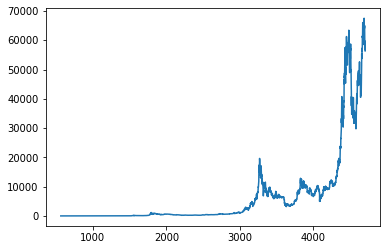

In [ ]:
#plot_btc = btc_price.set_index("date", inplace=True)
#print(plot_btc)
btc_price['PriceUSD'].plot()

In [ ]:
for el in years:
  print(""+ str(el)+ " in USD: Mean price: " + str(round(btc_price[btc_price['year'] == str(el)]['PriceUSD'].mean(), 2)) +
        ",  Variance: " +str(round(btc_price[btc_price['year'] == str(el)]['PriceUSD'].std(), 2)))
  if years.index(el) !=0:
    V1 = btc_price[btc_price['year'] == str(el-1)]['PriceUSD'].mean()
    V2 = btc_price[btc_price['year'] == str(el)]['PriceUSD'].mean()
    print("Price change: " + str(round((V2 - V1)/abs(V1) * 100, 2)) + " %")


2010 in USD: Mean price: 0.14,  Variance: 0.09
2011 in USD: Mean price: 5.64,  Variance: 5.61
Price change: 3885.33 %
2012 in USD: Mean price: 8.29,  Variance: 3.21
Price change: 46.97 %
2013 in USD: Mean price: 188.86,  Variance: 244.42
Price change: 2177.8 %
2014 in USD: Mean price: 525.17,  Variance: 143.61
Price change: 178.08 %
2015 in USD: Mean price: 272.88,  Variance: 59.18
Price change: -48.04 %
2016 in USD: Mean price: 568.2,  Variance: 138.92
Price change: 108.22 %
2017 in USD: Mean price: 3994.49,  Variance: 4026.87
Price change: 603.01 %
2018 in USD: Mean price: 7519.17,  Variance: 2421.41
Price change: 88.24 %
2019 in USD: Mean price: 7365.21,  Variance: 2651.35
Price change: -2.05 %
2020 in USD: Mean price: 11119.06,  Variance: 4311.46
Price change: 50.97 %
2021 in USD: Mean price: 47026.24,  Variance: 10184.25
Price change: 322.93 %


# **Daily predictive power of the crypto**

**Daily return difference by year**

```
# This is formatted as code
```

**

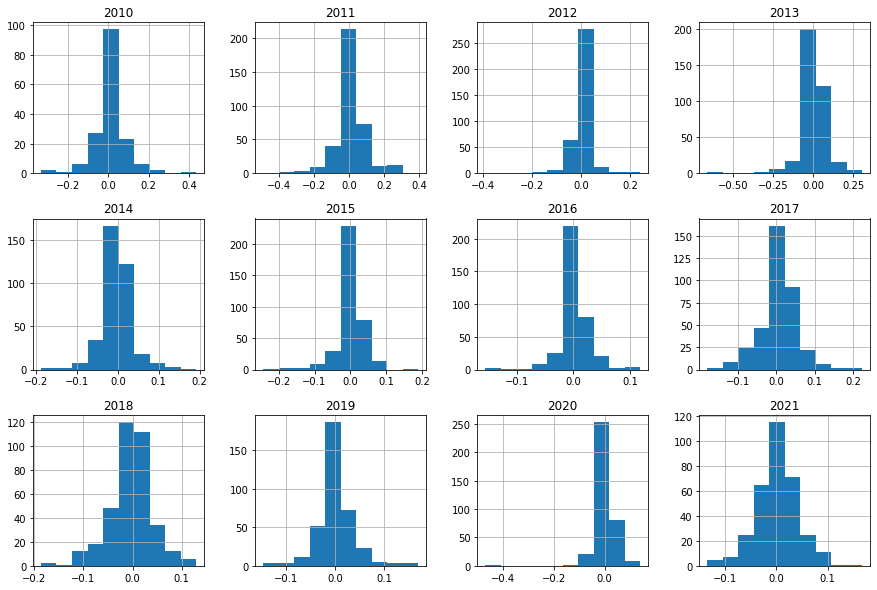

In [ ]:

#matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)


fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8), (ax9, ax10, ax11, ax12)) = plt.subplots(ncols=4, nrows=3,figsize=(15, 10))
axes = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12]
for idx, el in enumerate(years):
  btc_price[btc_price['year'] == str(el)].hist('log_diff', ax=axes[idx])
  axes[idx].set_title(str(el))


# **TIME SERIES ANALYSIS**

**Autocorrelation**

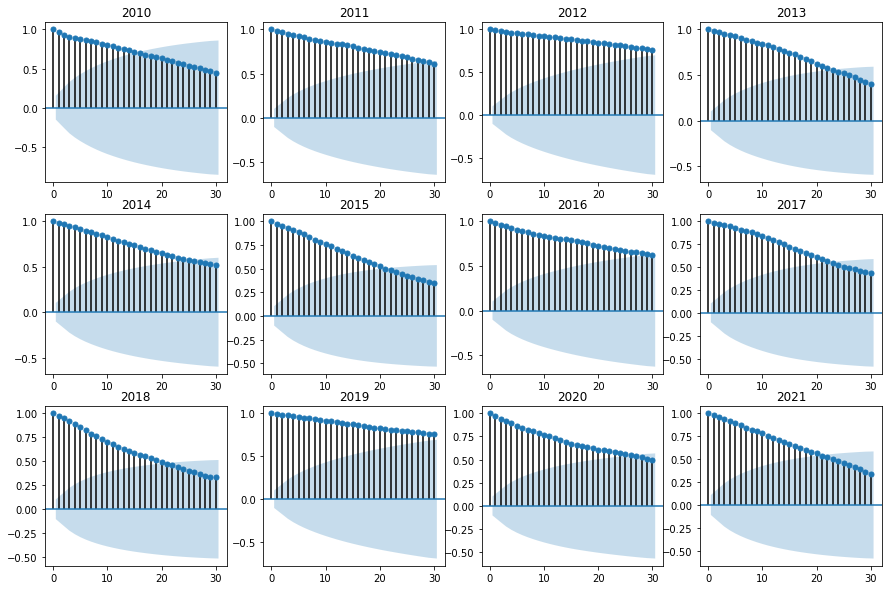

In [ ]:
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8), (ax9, ax10, ax11, ax12)) = plt.subplots(ncols=4, nrows=3,figsize=(15, 10))
axes = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12]
for idx, el in enumerate(years):
  plot_acf(btc_price[btc_price['year'] == str(el)]['PriceUSD'],  lags=30, ax=axes[idx])
  axes[idx].set_title(str(el))

**Partial Autocorrelation**

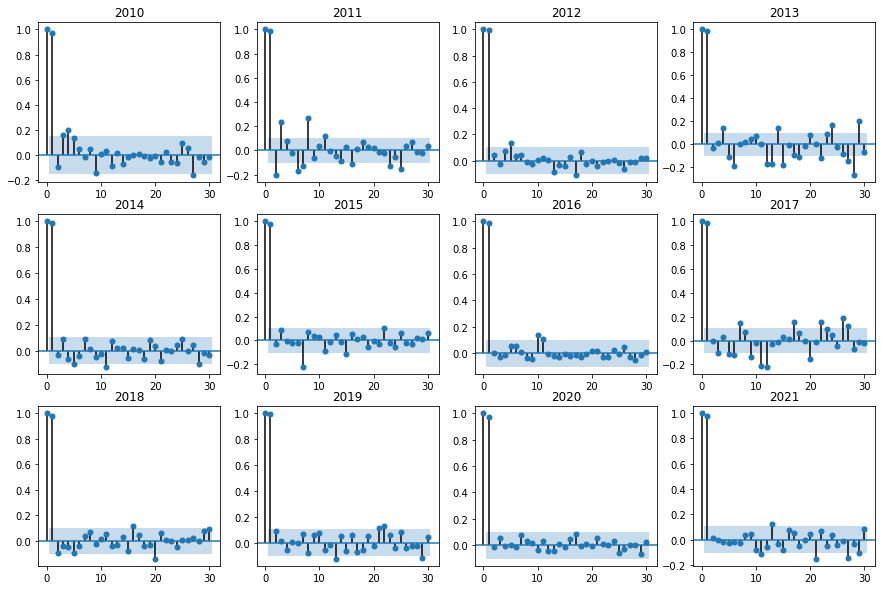

In [ ]:
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8), (ax9, ax10, ax11, ax12)) = plt.subplots(ncols=4, nrows=3,figsize=(15, 10))
axes = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12]
for idx, el in enumerate(years):
  plot_pacf(btc_price[btc_price['year'] == str(el)]['PriceUSD'],  lags=30, ax=axes[idx])
  axes[idx].set_title(str(el))

**Autocorrelation and Partial Autocorrelation for the whole time**

Text(0.5, 1.0, 'Parcial autocorrelation')

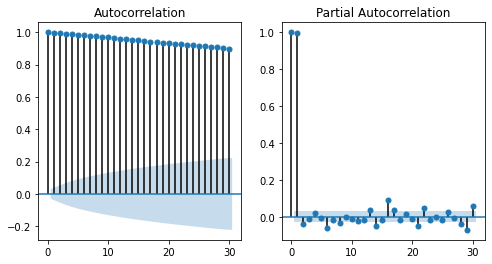

In [ ]:
fig, ((ax1, ax2)) = plt.subplots(ncols=2, nrows=1,figsize=(8, 4))
plot_acf(btc_price['PriceUSD'],  lags=30, ax=ax1)
axes[idx].set_title("Autocorrelation")
plot_pacf(btc_price['PriceUSD'],  lags=30, ax=ax2)
axes[idx].set_title("Parcial autocorrelation")

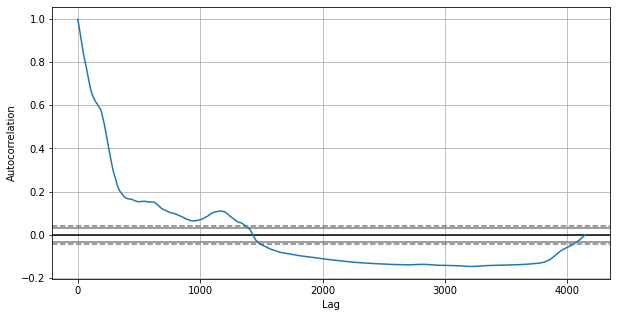

In [ ]:
fig, ((ax1)) = plt.subplots(ncols=1, nrows=1, figsize=(10, 5))
pd.plotting.autocorrelation_plot(btc_price['PriceUSD'], ax = ax1)

In [ ]:
btc_price.head()

,date,PriceUSD,t-1,year,log_diff,change%,target
562,2010-07-19,0.080800,0.085840,2010,-0.060508,-6.05,0
563,2010-07-20,0.074736,0.080800,2010,-0.078019,-7.80,0
564,2010-07-21,0.079193,0.074736,2010,0.057928,5.79,1
565,2010-07-22,0.058470,0.079193,2010,-0.303376,-30.34,0
566,2010-07-23,0.060593,0.058470,2010,0.035668,3.57,1


In [ ]:
btc_price['PriceUSD']

564         0.079193
565         0.058470
566         0.060593
567         0.054540
568         0.050541
            ...     
4702    56794.155627
4703    58014.072989
4704    59749.473823
4705    59032.624102
4706    56383.565876
Name: PriceUSD, Length: 4143, dtype: float64

Prediction


In [ ]:
btc_price['PriceUSD']

564         0.079193
565         0.058470
566         0.060593
567         0.054540
568         0.050541
            ...     
4702    56794.155627
4703    58014.072989
4704    59749.473823
4705    59032.624102
4706    56383.565876
Name: PriceUSD, Length: 4143, dtype: float64

In [ ]:
btc_price['PriceUSD']

564         0.079193
565         0.058470
566         0.060593
567         0.054540
568         0.050541
            ...     
4702    56794.155627
4703    58014.072989
4704    59749.473823
4705    59032.624102
4706    56383.565876
Name: PriceUSD, Length: 4143, dtype: float64

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X, y)

# **SOURCES:**


*   https://machinelearningmastery.com/decompose-time-series-data-trend-seasonality/
*   https://pythondata.com/forecasting-time-series-autoregression/
* https://otexts.com/fpp2/what-can-be-forecast.html
